<a href="https://colab.research.google.com/github/DJCordhose/buch-machine-learning-notebooks/blob/master/kap5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Kapitel 5: Featureauswahl

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
%matplotlib inline
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
import sklearn
print(sklearn.__version__)

0.22.2.post1


In [4]:
import numpy as np

In [5]:
import matplotlib.pyplot as plt

## Fluch der hohen Dimensionen

In [6]:
n = 100
vmin = 0; vmax = 10
x1 =  np.random.uniform(vmin, vmax, n)
x2 =  np.random.uniform(vmin, vmax, n)
x3 =  np.random.uniform(vmin, vmax, n)

In [7]:
# plt.hist?

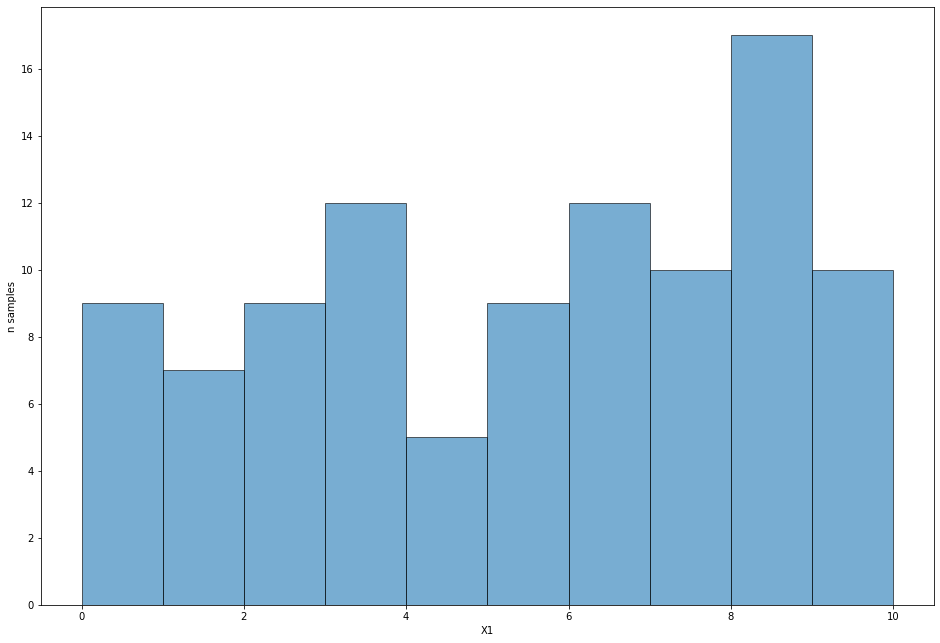

In [8]:
# Eine Dimension

fig = plt.figure(figsize=(16, 11))
ax = fig.add_subplot(111)

ax.hist(x1, alpha=0.6, edgecolor='black', lw=1, bins=np.arange(0, 11, 1))

ax.set_xlabel('X1')
ax.set_ylabel('n samples')

# fig.savefig('ML_0512.png', bbox_inches='tight')
plt.show()

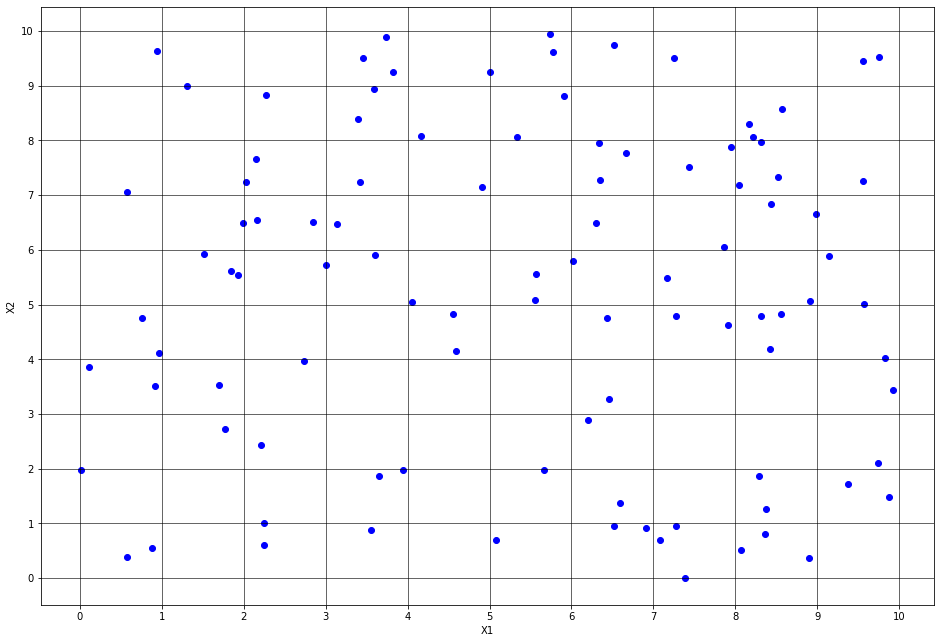

In [9]:
# Zwei Dimensionen

fig = plt.figure(figsize=(16, 11))
ax = fig.add_subplot(111)

ax.scatter(x1, x2, c="b", marker="o")

ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_xticks(np.arange(0, 11, 1) )
ax.set_yticks(np.arange(0, 11, 1) )
ax.grid(color='k', linestyle='-', linewidth=1, alpha=0.6)

# fig.savefig('ML_0513.png', bbox_inches='tight')
plt.show()
# plt.clf()

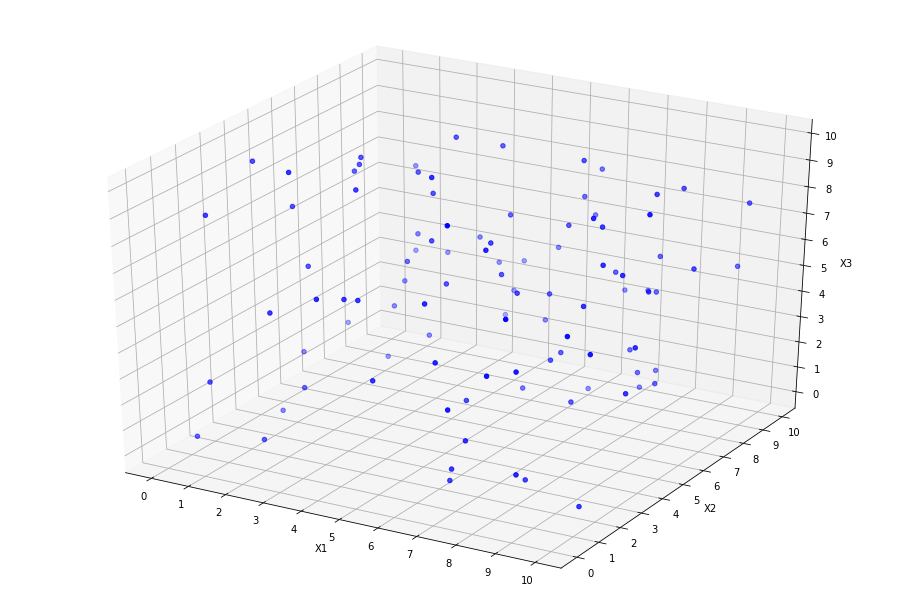

In [10]:
# Drei Dimensionen
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(16, 11))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(x1, x2, x3, c="b", marker="o")

# ax.plot_wireframe((3,4,4,3,3, 3,4,4,3,3, 3,3,4,4,4,4),
#                   (5,5,6,6,5, 5,5,6,6,5, 6,6,6,6,5,5),
#                   (2,2,2,2,2, 3,3,3,3,3, 3,2,2,3,3,2),
#                   color='r', rstride=1, cstride=1, alpha=0.9)

ax.set_xticks(np.arange(0, 11, 1) )
ax.set_yticks(np.arange(0, 11, 1) )
ax.set_zticks(np.arange(0, 11, 1) )
ax.grid(color='k', linestyle='-', linewidth=1, alpha=0.6)
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('X3')

# fig.savefig('ML_0514.png', bbox_inches='tight')
plt.show()
# plt.clf()

## Overfitting und Underfitting: Model-Komplexität vs Datenmenge

In [11]:
np.random.RandomState(1)

n_samples = 20
X = np.random.uniform(-2, 2, n_samples)
y = X**3 + np.random.uniform(0, 2, n_samples)

(20,) (20,)


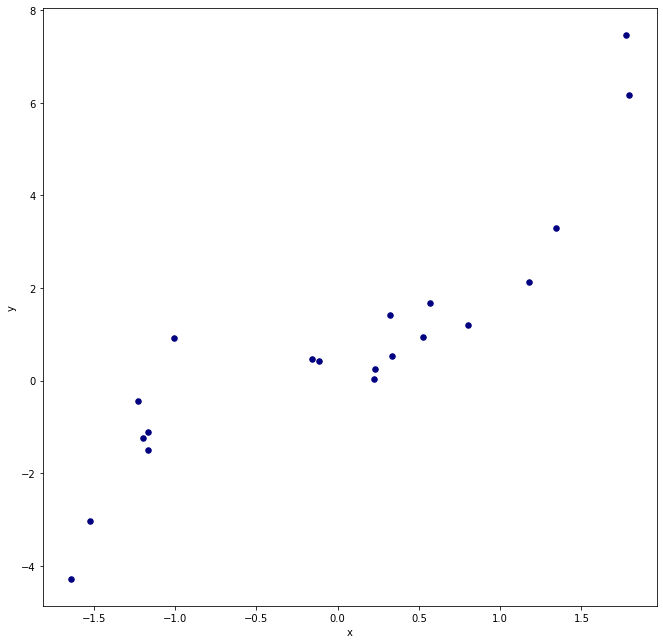

In [12]:
fig, ax = plt.subplots(figsize=(11, 11))

print(X.shape, y.shape)
plt.scatter(X, y, color='navy', s=30, marker='o')

plt.xlabel('x')
plt.ylabel('y')

# fig.savefig('ML_0504.png', bbox_inches='tight')
plt.show()
# plt.clf()

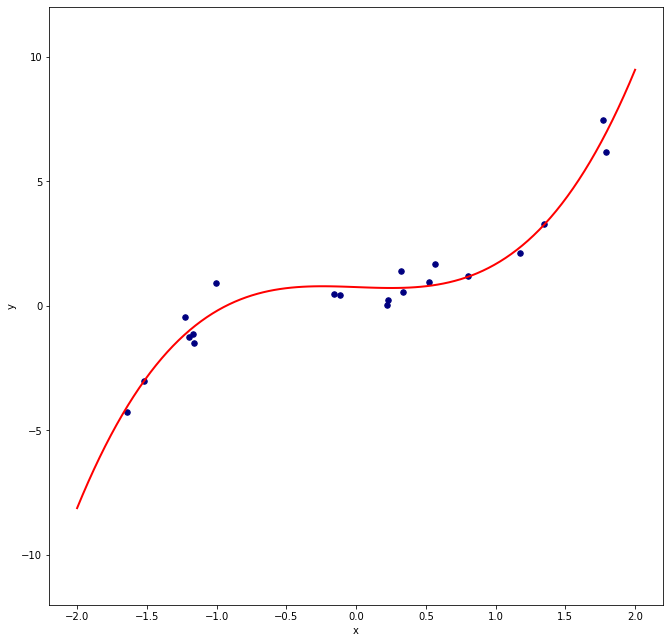

In [13]:
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import Ridge, LinearRegression
from sklearn.preprocessing import PolynomialFeatures

fig, ax = plt.subplots(figsize=(11, 11))
plt.scatter(X, y, color='navy', s=30, marker='o')

x_plot = np.linspace(-2, 2, 100)
poly_model = make_pipeline(PolynomialFeatures(3),
                           LinearRegression())
poly_model.fit(X[:, np.newaxis], y)
y_plot = poly_model.predict(x_plot[:, np.newaxis])
plt.plot(x_plot, y_plot, lw=2, color="red")
plt.ylim(-12, 12)

plt.xlabel('x')
plt.ylabel('y')

# fig.savefig('ML_0505.png', bbox_inches='tight')
plt.show()
# plt.clf()

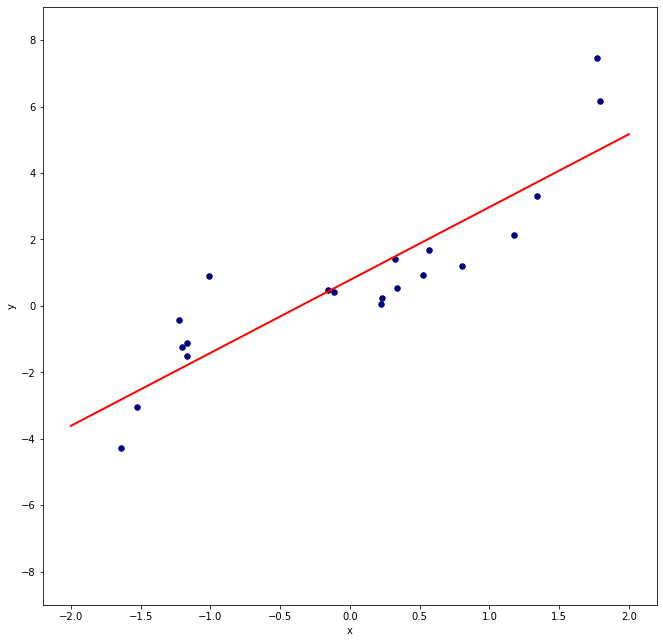

In [14]:
fig, ax = plt.subplots(figsize=(11, 11))
plt.scatter(X, y, color='navy', s=30, marker='o')


poly_model = make_pipeline(PolynomialFeatures(1),
                           LinearRegression())
poly_model.fit(X[:, np.newaxis], y)
y_plot = poly_model.predict(x_plot[:, np.newaxis])
plt.plot(x_plot, y_plot, lw=2, color="red")
plt.ylim(-9, 9)

plt.xlabel('x')
plt.ylabel('y')

# fig.savefig('ML_0507.png', bbox_inches='tight')
plt.show()
# plt.clf()

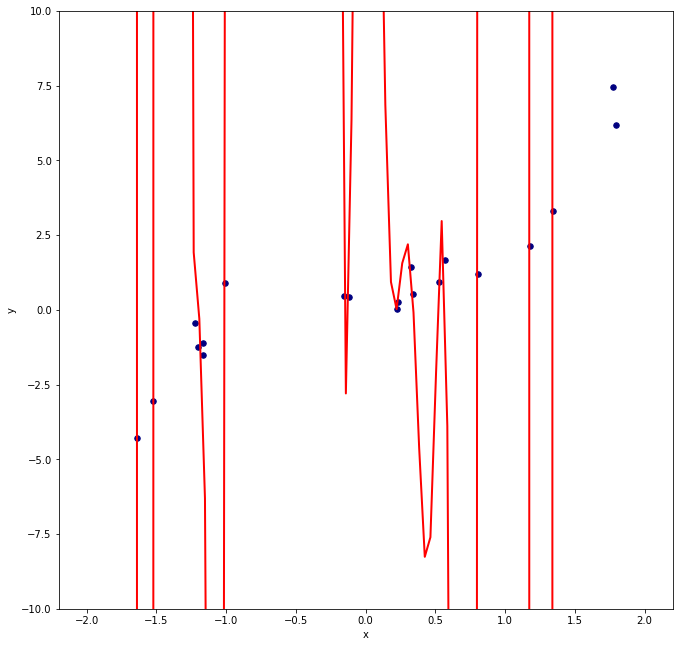

In [15]:
fig, ax = plt.subplots(figsize=(11, 11))
plt.scatter(X, y, color='navy', s=30, marker='o')

poly_model = make_pipeline(PolynomialFeatures(20), LinearRegression())
poly_model.fit(X[:, np.newaxis], y)
y_plot = poly_model.predict(x_plot[:, np.newaxis])
plt.plot(x_plot, y_plot, lw=2, color="red")
plt.ylim(-10, 10)

plt.xlabel('x')
plt.ylabel('y')

# fig.savefig('ML_0506.png', bbox_inches='tight')
plt.show()
# plt.clf()

### Mehr Datensätze

In [16]:
n_samples = 200
X = np.random.uniform(-2, 2, n_samples)
y = X**3 + np.random.uniform(0, 2, n_samples)

(200,) (200,)


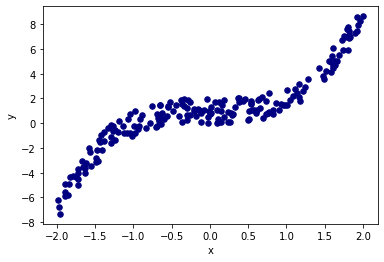

In [17]:
print(X.shape, y.shape)
plt.scatter(X, y, color='navy', s=30, marker='o', label="training points")

plt.xlabel('x')
plt.ylabel('y')

# fig.savefig('ML_0508.png', bbox_inches='tight')
plt.show()
# plt.clf()

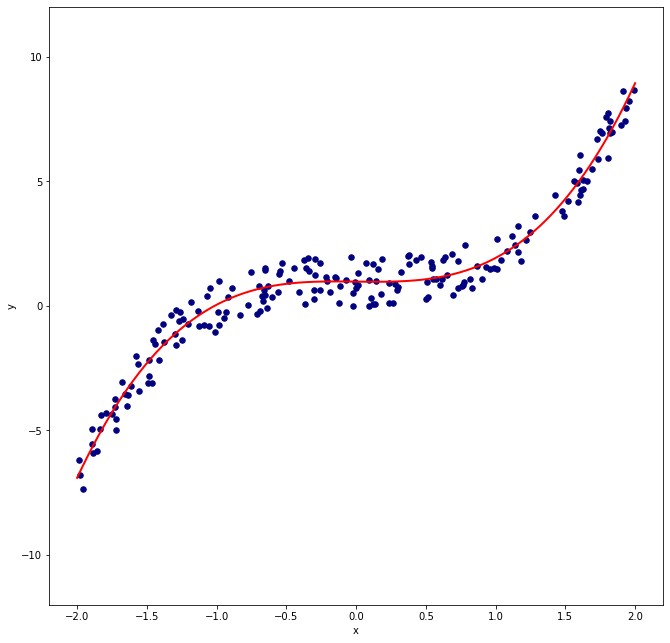

In [18]:
fig, ax = plt.subplots(figsize=(11, 11))
plt.scatter(X, y, color='navy', s=30, marker='o', label="training points")

poly_model = make_pipeline(PolynomialFeatures(3),
                           LinearRegression())
poly_model.fit(X[:, np.newaxis], y)
y_plot = poly_model.predict(x_plot[:, np.newaxis])
plt.plot(x_plot, y_plot, lw=2, color="red")
plt.ylim(-12, 12)

plt.xlabel('x')
plt.ylabel('y')

# fig.savefig('ML_0509.png', bbox_inches='tight')
plt.show()
# plt.clf()

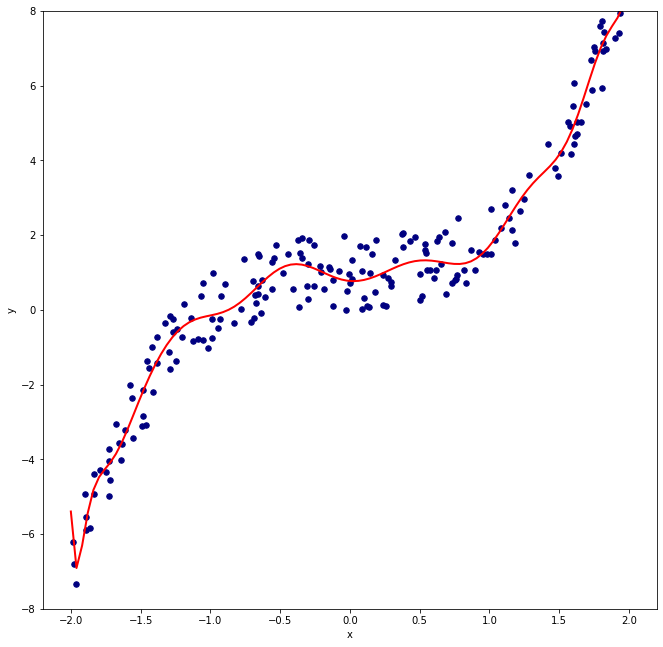

In [19]:
fig, ax = plt.subplots(figsize=(11, 11))
plt.scatter(X, y, color='navy', s=30, marker='o', label="training points")

poly_model = make_pipeline(PolynomialFeatures(20),
                           LinearRegression())
poly_model.fit(X[:, np.newaxis], y)
y_plot = poly_model.predict(x_plot[:, np.newaxis])
plt.plot(x_plot, y_plot, lw=2, color="red")
plt.ylim(-8, 8)

plt.xlabel('x')
plt.ylabel('y')

# fig.savefig('ML_0510.png', bbox_inches='tight')
plt.show()
# plt.clf()

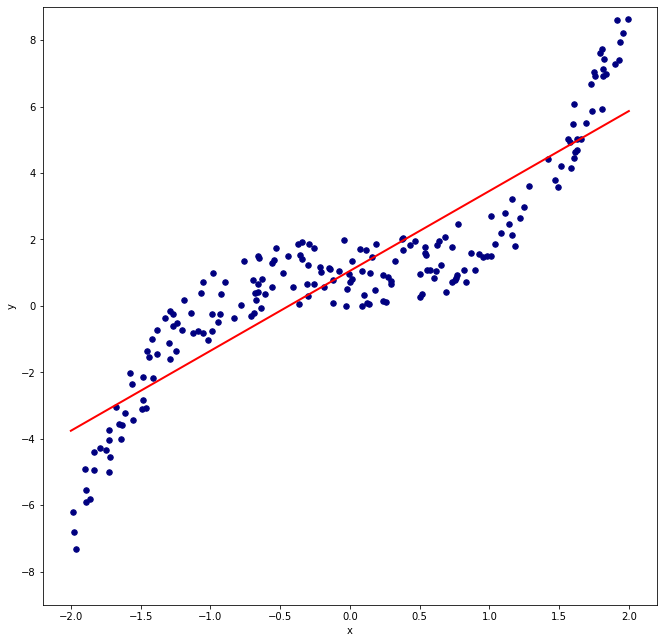

In [20]:
fig, ax = plt.subplots(figsize=(11, 11))
plt.scatter(X, y, color='navy', s=30, marker='o', label="training points")

poly_model = make_pipeline(PolynomialFeatures(1),
                           LinearRegression())
poly_model.fit(X[:, np.newaxis], y)
y_plot = poly_model.predict(x_plot[:, np.newaxis])
plt.plot(x_plot, y_plot, lw=2, color="red")
plt.ylim(-9, 9)

plt.xlabel('x')
plt.ylabel('y')

# fig.savefig('ML_0511.png', bbox_inches='tight')
plt.show()
# plt.clf()

## Univariate Feature Exploration

In [21]:
from sklearn.datasets import load_iris
from sklearn.svm import SVC

iris = load_iris()

X = iris.data
y = iris.target
print(X.shape, y.shape)

import numpy as np
import matplotlib.pyplot as plt

svc = SVC(kernel='linear', C=1E0)
print(X.shape, y.shape)

n_classes = 3
colors = 'byr'
CMAP = colors
plot_step = 0.01

# Add random noise
rns = np.random.RandomState(12)
#noise1 = rns.lognormal(mean=1, size=(len(X), 1))
noise2 = rns.uniform(0, 6, size=(len(X), 1))

#X_noise = np.hstack([X, noise1])
X_noise = np.hstack([X, noise2])

(150, 4) (150,)
(150, 4) (150,)


0.7466666666666667
0.7466666666666667
0.7466666666666667
0.5533333333333333
0.5533333333333333
0.5533333333333333
0.9533333333333334
0.9533333333333334
0.9533333333333334
0.96
0.96
0.96


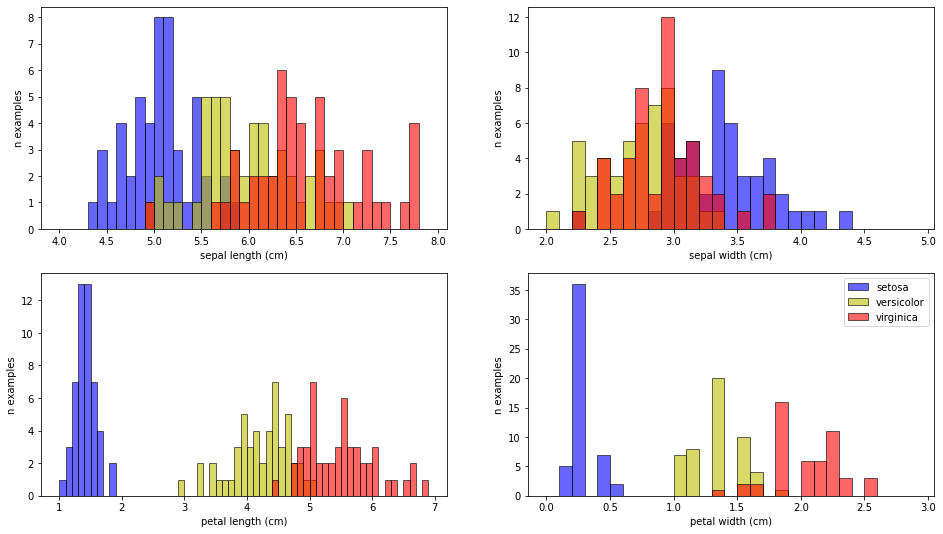

In [22]:
Y_feature_names = iris.feature_names
Y_target_names = iris.target_names
Y_feature_names = np.append(Y_feature_names, 'noise1')
#Y_feature_names = np.append(Y_feature_names, 'noise2')
Y_target_names = np.append(Y_target_names, 'noise1')
#Y_target_names = np.append(Y_target_names, 'noise2')


#fig = plt.figure(1, figsize=(9, 16))
fig = plt.figure(1, figsize=(16, 9))

BINS = []
BINS.append(np.arange(4, 8, 0.1))
BINS.append(np.arange(2, 5, 0.1))
BINS.append(np.arange(1, 7, 0.1))
BINS.append(np.arange(0, 3, 0.1))
BINS.append(np.arange(0, 6, 0.1))
#BINS.append(np.arange(0, 6, 0.1))
for fid in range(4):
#for fid in range(5):
    X = X_noise[:, fid]
    y = iris.target

    #plt.subplot(3, 2, fid + 1)
    plt.subplot(2, 2, fid + 1)

    plt.xlabel(Y_feature_names[fid])
    plt.ylabel('n examples')
    plt.axis("tight")

    for i, color in zip(range(n_classes), colors):
        idx = np.where(y == i)
        clf = svc.fit(X.reshape([150,1]), y)
        print(clf.score(X.reshape([150,1]), y))
        plt.hist(X[idx], alpha=0.6, color=color, edgecolor='black', lw=1, label=Y_target_names[i],
                 bins=BINS[fid])
        if fid==3:
            plt.legend(loc='upper right')

    plt.axis("tight")

plt.show()

# fig.savefig('ML_0501.png', bbox_inches='tight')
# plt.clf()

## Bivariate Feature Exploration

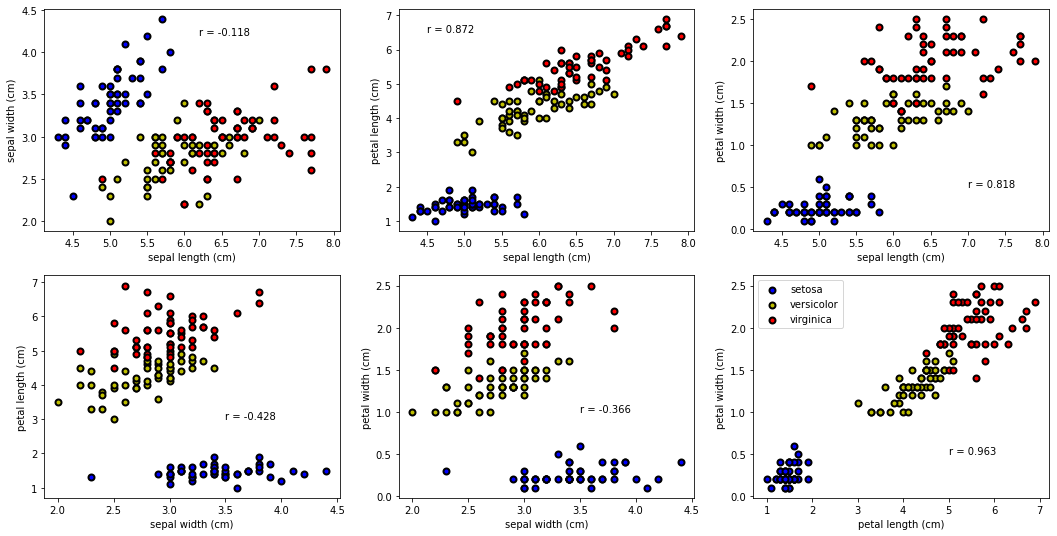

In [23]:
from scipy.stats import pearsonr

Y_feature_names = iris.feature_names
#Y_target_names = iris.target_names
#Y_feature_names = np.append(Y_feature_names, 'noise1')
#Y_feature_names = np.append(Y_feature_names, 'noise2')
#Y_target_names = np.append(Y_target_names, 'noise1')
#Y_target_names = np.append(Y_target_names, 'noise2')


n_classes = 3
colors = 'byr'
CMAP = colors
plot_step = 0.01

#____________________________________________________________________
fig = plt.figure(1, figsize=(18, 9))

pos = [[6.2, 4.2], [4.5, 6.5], [7, 0.5], [3.5, 3], [3.5, 1], [5, 0.5]]

for pairidx, pair in enumerate([[0, 1], [0, 2], [0, 3],
                                [1, 2], [1, 3], [2, 3]]):
    X = iris.data[:, pair]
    y = iris.target

    plt.subplot(2, 3, pairidx + 1)

    plt.xlabel(iris.feature_names[pair[0]])
    plt.ylabel(iris.feature_names[pair[1]])
    plt.axis("tight")

    for i, color in zip(range(n_classes), colors):
        idx = np.where(y == i)
        plt.scatter(X[idx, 0], X[idx, 1], c=color, edgecolor='black', lw=2, label=iris.target_names[i],
                    cmap=CMAP)

    r = "r = " + str(round(pearsonr(X[:, 0], X[:, 1])[0], 3))
    plt.text(pos[pairidx][0], pos[pairidx][1], r)
    plt.axis("tight")
    plt.axis("tight")

plt.legend(loc='upper left')
plt.show()

# fig.savefig('ML_0502.png', bbox_inches='tight')
# plt.clf()

## Korrelation zwischen Feature und Target

In [24]:
from sklearn.datasets import load_iris
import numpy as np
from scipy.stats import pearsonr # pearson package from scipy
iris = load_iris() # reload data
X = iris.data
y = iris.target
for fid in (0, 1, 2, 3): # loop over all features
    idx = np.where( (y == 0) | (y == 1) )
    x = X[idx]
    x = x[:, fid]
    print(iris.feature_names[fid], pearsonr(x, y[idx])[0])

sepal length (cm) 0.7282901487462142
sepal width (cm) -0.690684336405237
petal length (cm) 0.969990231486349
petal width (cm) 0.9603069679112729


In [25]:
x = np.random.uniform(-1, 1, 1000)
print(pearsonr(x, x**2)[0])

-0.03650855721598934


## Principal Component Analyse

In [26]:
import numpy as np
import matplotlib.pyplot as plt

rns = np.random.RandomState(12)

size = 200
X = np.zeros((size, 2))
x1 = rns.uniform(0, 2, size=size)
x2 = -1.1*x1+1.8 + rns.normal(0, 0.2, size=size)
X[:, 0] = x1
X[:, 1] = x2

from sklearn.decomposition import PCA

pca = PCA(n_components=2, whiten=True)
pca.fit(X)

print(pca.explained_variance_)
print()
print(pca.components_)
print()
print(pca.mean_)
print()

[0.81109522 0.0167764 ]

[[-0.64570541  0.76358662]
 [-0.76358662 -0.64570541]]

[1.0178832 0.6643377]



[-0.64570541  0.76358662]
[-0.76358662 -0.64570541]


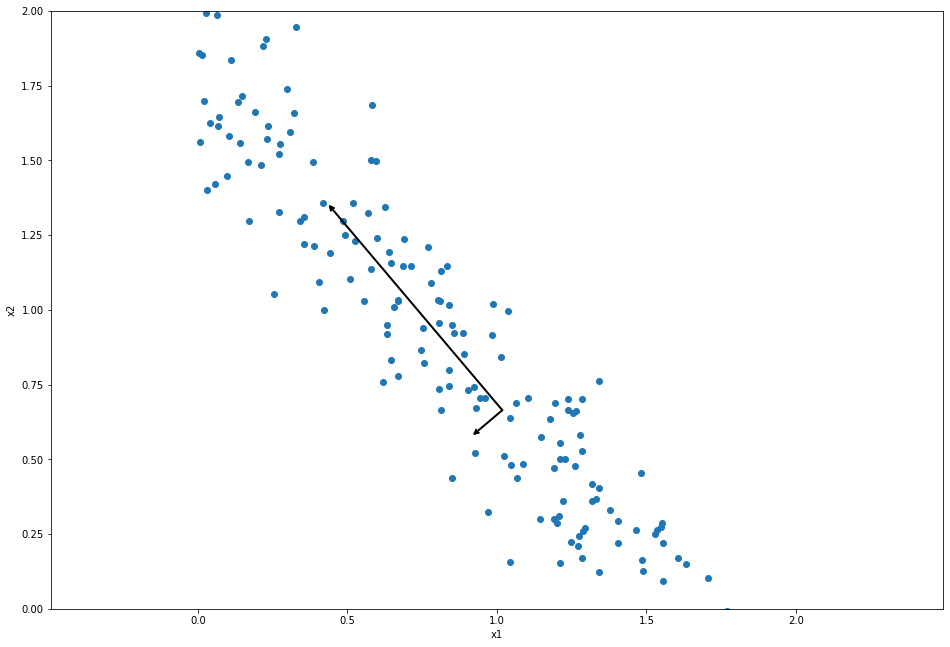

In [27]:
fig = plt.figure(figsize=(16, 11))

plt.scatter(X[:, 0], X[:, 1])
arrowprops = dict(arrowstyle='->',
                  linewidth=2, shrinkA=0, shrinkB=0)
for length, vector in zip(pca.explained_variance_, pca.components_):
    print(vector)
    v = vector * 1 * np.sqrt(length)
    ax = plt.gca()
    ax.annotate('', pca.mean_ + v, pca.mean_, arrowprops=arrowprops)

plt.axis('equal')
plt.xlim(0, 2)
plt.ylim(0, 2)
plt.xlabel('x1')
plt.ylabel('x2')

# fig.savefig('ML_0515.png', bbox_inches='tight')
plt.show()
# plt.clf()

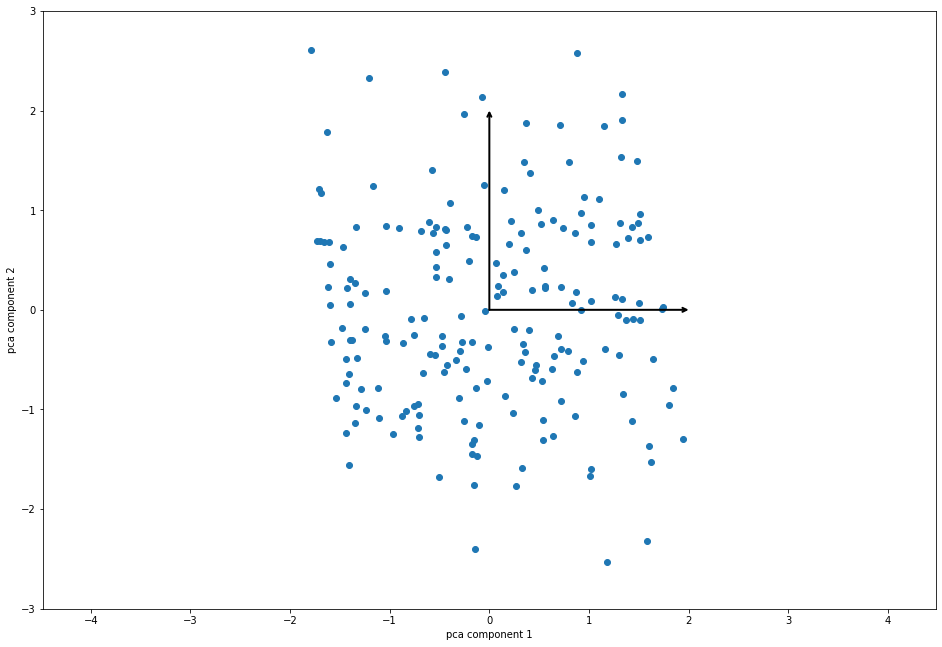

In [28]:
fig = plt.figure(figsize=(16, 11))

X_pca = pca.transform(X)
plt.scatter(X_pca[:, 0], X_pca[:, 1])

plt.annotate('', [0, 2], [0, 0], arrowprops=arrowprops)
plt.annotate('', [2, 0], [0, 0], arrowprops=arrowprops)

plt.axis('equal')
plt.xlim(-3, 3)
plt.ylim(-3, 3)
plt.xlabel('pca component 1')
plt.ylabel('pca component 2')

# fig.savefig('ML_0516.png', bbox_inches='tight')
plt.show()
# plt.clf()

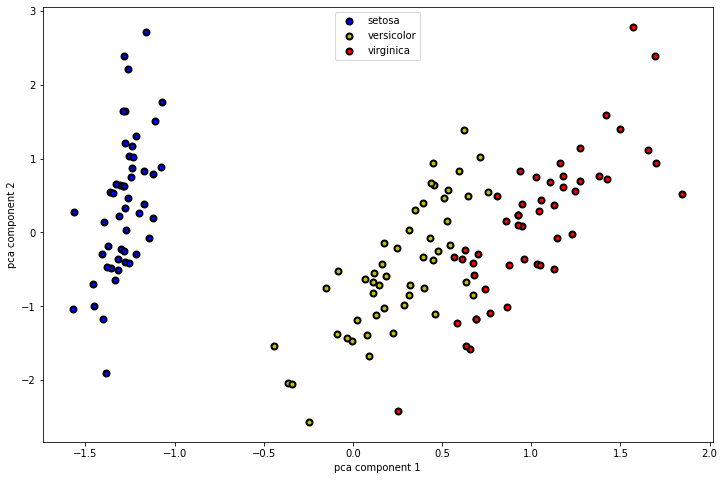

In [29]:
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

n_classes = 3
colors = 'byr'
CMAP = colors

iris = load_iris()

X = iris.data
y = iris.target

Y_target_names = iris.target_names


pca = PCA(n_components=2, whiten=True)
pca.fit(X)

#_________________________________________________________
fig = plt.figure(figsize=(12, 8))

X_pca = pca.transform(X)

for i, color in zip(range(n_classes), colors):
    idx = np.where(y == i)
    plt.scatter(X_pca[idx, 0], X_pca[idx, 1], label = Y_target_names[i],  c=color,
                edgecolor='black', lw=2, cmap=CMAP)

plt.axis("tight")
plt.xlabel('pca component 1')
plt.ylabel('pca component 2')
plt.legend(loc='upper center')

# fig.savefig('ML_0519.png', bbox_inches='tight')
plt.show()
# plt.clf()

## Featureselektion

In [30]:
from sklearn.datasets import load_iris
from sklearn.svm import SVC
import numpy as np

iris = load_iris()
X = iris.data
y = iris.target

# reference score
svc = SVC(kernel='linear', C=1)
clf = svc.fit(X, y)
print(clf.score(X, y))

0.9933333333333333


In [31]:
# Add random noise as non informative data
rns = np.random.RandomState(12)
noise = rns.uniform(0, 6, size=(len(X), 1))
X = np.hstack([X, noise])

# Score with all noise
clf = svc.fit(X, y)
print(clf.score(X, y))

0.9933333333333333


In [32]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

selector = SelectKBest(f_classif, k=4)
X_sel = selector.fit_transform(X, y)

In [33]:
print(selector.scores_)

[1.19264502e+02 4.91600401e+01 1.18016118e+03 9.60007147e+02
 9.48960689e-01]


In [34]:
svc = SVC(kernel='linear', C=1)
clf = svc.fit(X_sel, y)
print(clf.score(X_sel, y))

0.9933333333333333


## Selektion nach Tree-Modellen

In [35]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()
clf.fit(X, y)
print(clf.feature_importances_)

[0.12635013 0.05162818 0.42587259 0.37392282 0.02222628]


In [36]:
selector = SelectFromModel(clf, threshold=0.02)
X_sel = selector.fit_transform(X, y)
print(selector.get_support())

[ True  True  True  True  True]


In [37]:
svc = SVC(kernel='linear')
clf = svc.fit(X_sel, y)
print(clf.score(X_sel, y))

0.9933333333333333


## Rekursive Eliminierung nach Modellen

In [38]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(random_state=12)
clf.fit(X, y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=12, verbose=0,
                       warm_start=False)

In [39]:
from sklearn.feature_selection import RFE
selector = RFE(clf, 4)

In [40]:
selector = selector.fit(X, y)

In [41]:
print(selector.get_support())

[ True  True  True  True False]
